# Question2: Death Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Section1

In [3]:
df=pd.read_csv('Downloads/heart_failure.csv')

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

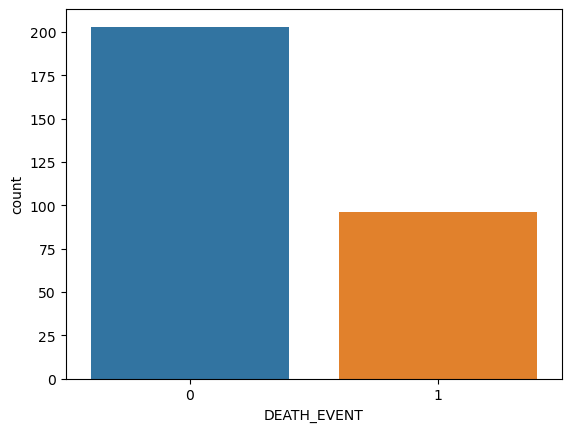

In [8]:
sns.countplot(df['DEATH_EVENT'])

In [9]:
#sampling
dead_id=np.random.choice(df[df['DEATH_EVENT']==1].shape[0],size=90,replace=False)
alive_id=np.random.choice(df[df['DEATH_EVENT']==0].shape[0],size=90,replace=False)
dead=df.iloc[dead_id]
alive=df.iloc[alive_id]

# Section2

<AxesSubplot:>

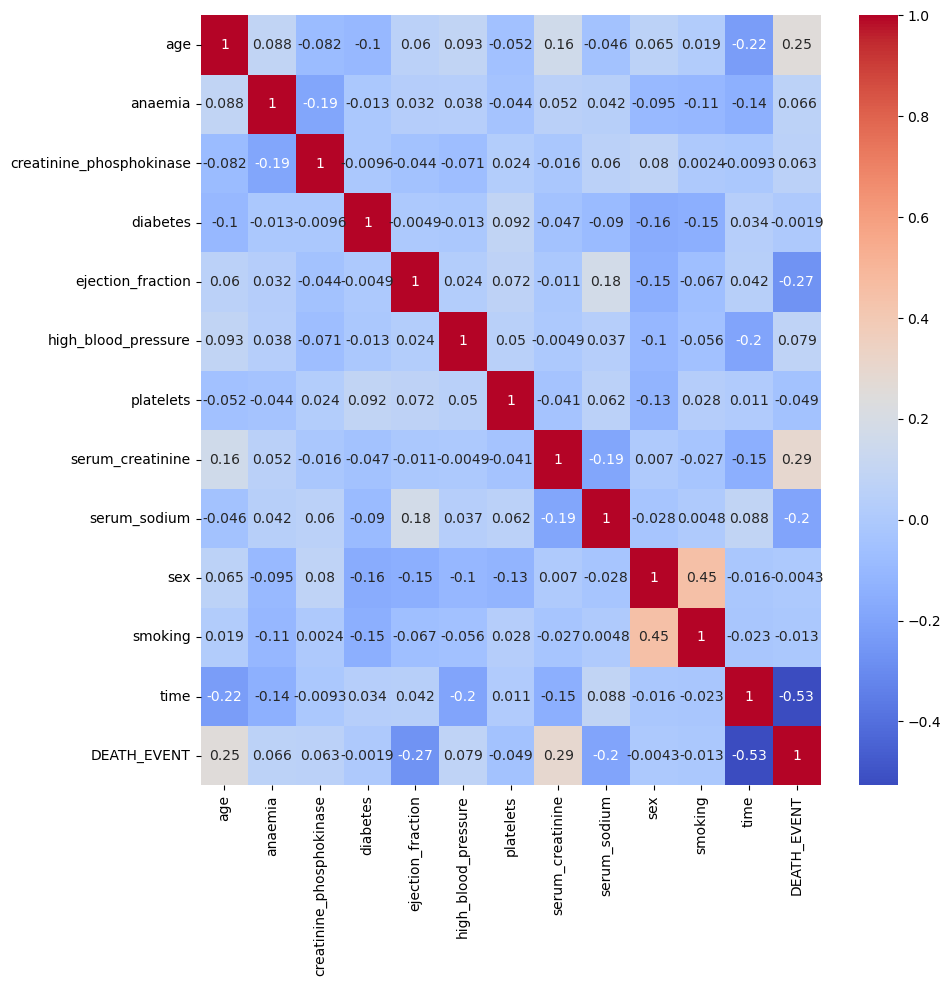

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')  #time and serumcreatinine

<AxesSubplot:>

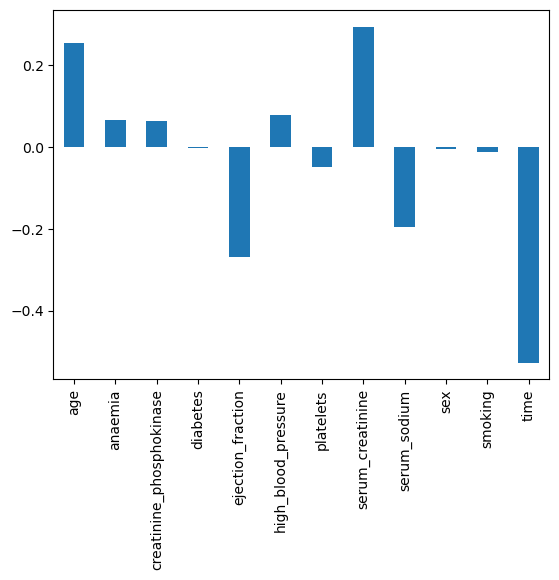

In [11]:
df.drop('DEATH_EVENT',axis=1).apply(lambda x: x.corr(df['DEATH_EVENT'])).plot(kind='bar')

# Section3

In [12]:
sample=pd.concat([dead, alive])
sample.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
35,69.0,0,582,1,35,0,228000.0,3.5,134,1,0,30,1
54,60.0,1,260,1,38,0,255000.0,2.2,132,0,1,45,1
77,42.0,0,102,1,40,0,237000.0,1.2,140,1,0,74,0
60,45.0,0,7702,1,25,1,390000.0,1.0,139,1,0,60,1
26,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1


In [13]:
X=sample.drop('DEATH_EVENT',axis=1)
y=sample['DEATH_EVENT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
#Model training
from sklearn.svm import SVC
model=SVC(C=1,kernel='linear')
model.fit(X_train,y_train)
y_pred_n=model.predict(X_test)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred_n)
print('acc :',acc)

acc : 0.8166666666666667


In [15]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
#Model training after scaling
model=SVC(C=1,kernel='linear')
model.fit(X_train_scaled,y_train)
y_pred_n=model.predict(X_test_scaled)

accs=accuracy_score(y_test,y_pred_n)
print('acc after scaling:',accs)

acc after scaling: 0.8


In [17]:
#Gridsearch hyperparameter tuning
from sklearn.model_selection import GridSearchCV, KFold
model=SVC()

parameters={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.01, 1, 10, 100], 
            'gamma':[0.01, 1, 50, 100]}

cv = KFold(n_splits=5,shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid=parameters ,
                           scoring='accuracy', cv=cv, n_jobs=1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

print(f'Best parameters for SVM: { grid_search.best_params_} with score: {grid_search.best_score_}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} with score: 0.8166666666666667


# Section4

In [18]:
from sklearn.model_selection import cross_val_score

X_train_time=pd.DataFrame(X_train['time'])

cv = KFold(n_splits=5,shuffle=True, random_state=42)
model=SVC(C=10,kernel='rbf',gamma=0.01) 
model.fit(X_train_time,y_train)
scores = cross_val_score(model, X_train_time, y_train, cv=cv)

print(f'mean acc (trained by time): {np.mean(scores)}')

mean acc (trained by time): 0.8416666666666666


# Section5

In [19]:
columns=list(df.columns)
columns=columns[:-1]
columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [20]:
for feature in columns:
    a=np.array(X_train[feature])
    scores = cross_val_score(model,a.reshape(-1,1), y_train, cv=cv)
    print(f'mean acc for {feature} column : {np.mean(scores)}')

mean acc for age column : 0.575
mean acc for anaemia column : 0.425
mean acc for creatinine_phosphokinase column : 0.6833333333333333
mean acc for diabetes column : 0.39166666666666666
mean acc for ejection_fraction column : 0.5333333333333334
mean acc for high_blood_pressure column : 0.38333333333333336
mean acc for platelets column : 0.45
mean acc for serum_creatinine column : 0.5583333333333333
mean acc for serum_sodium column : 0.575
mean acc for sex column : 0.4083333333333333
mean acc for smoking column : 0.38333333333333336
mean acc for time column : 0.8416666666666666


best feature for prediction is "time"

# Section6

In [21]:
columns=columns[:-1]
columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking']

In [22]:
for feature in columns:
    a=np.array(X_train[['time',feature]])
    scores = cross_val_score(model,a, y_train, cv=cv)
    print(f'mean acc for time and {feature} column : {np.mean(scores)}')


mean acc for time and age column : 0.7583333333333333
mean acc for time and anaemia column : 0.8416666666666666
mean acc for time and creatinine_phosphokinase column : 0.725
mean acc for time and diabetes column : 0.8416666666666666
mean acc for time and ejection_fraction column : 0.7666666666666667
mean acc for time and high_blood_pressure column : 0.8416666666666666
mean acc for time and platelets column : 0.625
mean acc for time and serum_creatinine column : 0.8333333333333334
mean acc for time and serum_sodium column : 0.7916666666666666
mean acc for time and sex column : 0.8416666666666666
mean acc for time and smoking column : 0.8416666666666666


   time and {anaemia,diabetes,high_blood_pressure,sex,smoking} are best features for predicting death.